In [274]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# Data Cleaning:

In [220]:
ATT = pd.read_csv('ATT1.csv')

In [222]:
ATT['date'] = pd.to_datetime(ATT['date'], infer_datetime_format = True)

In [283]:
ATT.shape

(9190, 8)

In [223]:
ATT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9190 entries, 0 to 9189
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9190 non-null   datetime64[ns]
 1   open    9190 non-null   float64       
 2   high    9190 non-null   float64       
 3   low     9190 non-null   float64       
 4   close   9190 non-null   float64       
 5   volume  9190 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 430.9 KB


In [224]:
ATT = ATT.set_index('date')

In [225]:
ATT

,open,high,low,close,volume
date,,,,,
1984-07-19,1.0554,1.0576,1.0489,1.0489,934800
1984-07-20,1.0532,1.0599,1.0466,1.0510,1557600
1984-07-23,1.0466,1.0554,1.0378,1.0510,3313200
1984-07-24,1.0554,1.0666,1.0532,1.0599,1549200
1984-07-25,1.0599,1.0841,1.0576,1.0731,1828800
...,...,...,...,...,...
2020-12-24,28.7300,28.7600,28.5000,28.6900,19153092
2020-12-28,28.9300,28.9591,28.5000,28.5500,41575385
2020-12-29,28.6900,28.8800,28.5100,28.5400,36544749


In [226]:
ATT['day_of_week'] = ATT.index.dayofweek
ATT['day_of_month'] = ATT.index.day
ATT['month'] = ATT.index.month

In [227]:
ATT

,open,high,low,close,volume,day_of_week,day_of_month,month
date,,,,,,,,
1984-07-19,1.0554,1.0576,1.0489,1.0489,934800,3,19,7
1984-07-20,1.0532,1.0599,1.0466,1.0510,1557600,4,20,7
1984-07-23,1.0466,1.0554,1.0378,1.0510,3313200,0,23,7
1984-07-24,1.0554,1.0666,1.0532,1.0599,1549200,1,24,7
1984-07-25,1.0599,1.0841,1.0576,1.0731,1828800,2,25,7
...,...,...,...,...,...,...,...,...
2020-12-24,28.7300,28.7600,28.5000,28.6900,19153092,3,24,12
2020-12-28,28.9300,28.9591,28.5000,28.5500,41575385,0,28,12
2020-12-29,28.6900,28.8800,28.5100,28.5400,36544749,1,29,12


In [228]:
ATT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9190 entries, 1984-07-19 to 2020-12-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          9190 non-null   float64
 1   high          9190 non-null   float64
 2   low           9190 non-null   float64
 3   close         9190 non-null   float64
 4   volume        9190 non-null   int64  
 5   day_of_week   9190 non-null   int64  
 6   day_of_month  9190 non-null   int64  
 7   month         9190 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 646.2 KB


In [229]:
close = ATT['close']

In [231]:
len(ATT)

9190

# split into train and test:

In [232]:
train_size = int(len(ATT) * 0.9)
test_size = len(ATT) - train_size
train, test = ATT[0:train_size], ATT[train_size:len(ATT)]

print(train.shape,test.shape)

(8271, 8) (919, 8)


In [307]:
train

,open,high,low,close,volume,day_of_week,day_of_month,month
date,,,,,,,,
1984-07-19,-0.757251,-0.756653,-0.760143,-0.759290,-0.262137,3,19,7
1984-07-20,-0.757422,-0.756477,-0.760323,-0.759127,-0.227792,4,20,7
1984-07-23,-0.757933,-0.756821,-0.761015,-0.759127,-0.130977,0,23,7
1984-07-24,-0.757251,-0.755964,-0.759805,-0.758437,-0.228255,1,24,7
1984-07-25,-0.756903,-0.754625,-0.759459,-0.757413,-0.212836,2,25,7
...,...,...,...,...,...,...,...,...
2017-05-03,1.604238,1.578055,1.585826,1.572628,1.546730,2,3,5
2017-05-04,1.570979,1.542727,1.552730,1.548123,1.420542,3,4,5
2017-05-05,1.550271,1.561321,1.578195,1.582685,0.890105,4,5,5


In [308]:
test

,open,high,low,close,volume,day_of_week,day_of_month,month
date,,,,,,,,
2017-05-10,1.557174,1.557602,1.584553,1.575771,0.933069,2,10,5
2017-05-11,1.573489,1.551404,1.589960,1.575142,0.598590,3,11,5
2017-05-12,1.575999,1.555123,1.596012,1.578285,0.445680,4,12,5
2017-05-15,1.577882,1.560081,1.602378,1.584570,0.861990,0,15,5
2017-05-16,1.587922,1.564420,1.588373,1.559429,0.877442,1,16,5
...,...,...,...,...,...,...,...,...
2020-12-24,1.386737,1.363050,1.397386,1.385609,0.742531,3,24,12
2020-12-28,1.402231,1.378284,1.397386,1.374745,1.979033,0,28,12
2020-12-29,1.383638,1.372232,1.398172,1.373969,1.701613,1,29,12


In [233]:
#transform:
from sklearn.preprocessing import RobustScaler

f_columns = ['open', 'high', 'low','volume']

f_transformer = RobustScaler()
close_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
close_transformer = close_transformer.fit(train[['close']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['close'] = close_transformer.transform(train[['close']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['close'] = close_transformer.transform(test[['close']])

/Users/vickiwei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/vickiwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/vickiwei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [234]:
def create_dataset(X, y, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(X) - time_steps):
        a  = X.iloc[i:(i+time_steps)].to_numpy()
        dataX.append(a)
        dataY.append(y.iloc[i + time_steps])
    return np.array(dataX), np.array(dataY)

In [235]:
TIME_STEPS = 5

In [236]:
x_train, y_train = create_dataset(train, train.close, time_steps=TIME_STEPS)
x_test, y_test = create_dataset(test, test.close, time_steps=TIME_STEPS)


In [237]:
# samples, time_steps, n_features
print(x_train.shape,y_train.shape)

(8266, 5, 8) (8266,)


In [281]:
# #use the past 90 days to predict future 5 days close price
# X_train = []
# Y_train = []

# n_future = 5
# n_past = 90

# for i in range(n_past, len(train)-n_future+1):
#     X_train.append(train[i- n_past:i, 0:train[1]-1])
#     Y_train.append(training_set_scaled[i + n_future:i + n_future, 0])

# X_train, y_train = np.array(X_train), np.array(Y_train)

# LSTM Modeling:

In [238]:
model = keras.Sequential() 
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units = 128,
          input_shape=(x_train.shape[1],x_train.shape[2])
          )
    )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

In [241]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [293]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    #shuffle=False
)

Train on 7439 samples, validate on 827 samples
Epoch 1/10
7439/7439 [==============================] - 12s 2ms/sample - loss: 6.7897e-04 - val_loss: 0.0114
Epoch 2/10
7439/7439 [==============================] - 12s 2ms/sample - loss: 6.6222e-04 - val_loss: 0.0093
Epoch 3/10
7439/7439 [==============================] - 16s 2ms/sample - loss: 6.8797e-04 - val_loss: 0.0091
Epoch 4/10
7439/7439 [==============================] - 12s 2ms/sample - loss: 6.8720e-04 - val_loss: 0.0117
Epoch 5/10
7439/7439 [==============================] - 14s 2ms/sample - loss: 6.8302e-04 - val_loss: 0.0096
Epoch 6/10
7439/7439 [==============================] - 12s 2ms/sample - loss: 6.7572e-04 - val_loss: 0.0139
Epoch 7/10
7439/7439 [==============================] - 12s 2ms/sample - loss: 7.2767e-04 - val_loss: 0.0162
Epoch 8/10
7439/7439 [==============================] - 13s 2ms/sample - loss: 7.2907e-04 - val_loss: 0.0090
Epoch 9/10
7439/7439 [==============================] - 13s 2ms/sample - loss: 6.

# Visualize the Loss:

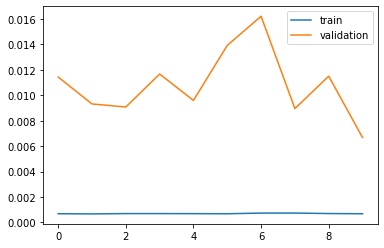

In [294]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

# Predict and Evaluate the Model:

In [320]:
y_pred = model.predict(x_test)

In [323]:
def RMSE(y_predict, y_actual):
    return np.sqrt(((y_predict - y_actual)**2).mean())

In [324]:
f'RMSE_LSTM: {RMSE(y_pred,y_test)}'

'RMSE_LSTM: 0.2626398624249927'

# Visualize the Prediction:

In [321]:
y_train_inv = close_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = close_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = close_transformer.inverse_transform(y_pred)


[]

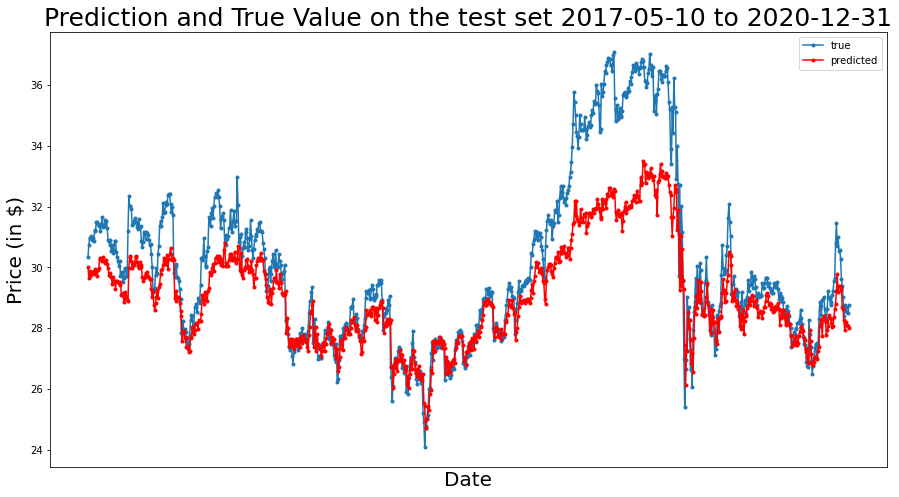

In [322]:
fig, ax = plt.subplots(figsize = (15,8))
plt.plot(y_test_inv.flatten(),marker='.', label='true')
plt.plot(y_pred_inv.flatten(),'r', marker='.', label='predicted')
plt.legend()
ax.set_title(f'Prediction and True Value on the test set 2017-05-10 to 2020-12-31', fontsize = 25) 
ax.set_xlabel('Date', fontsize = 20) 
ax.set_ylabel('Price (in $)', fontsize = 20)
ax.set_xticks([])